<a href="https://colab.research.google.com/github/antrecord/AI_python/blob/main/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # подключаем датасет из sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# сразу напишем код функции, которая будет вычислять все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [ ]:
# Читаем датасет
dataset = pd.read_csv('/content/crop_yield.csv', sep=',', encoding='cp1252')
dataset = dataset.sample(frac=0.01)

In [ ]:
# Выводи первые 5 строк
dataset.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
715633,East,Chalky,Rice,721.501248,28.302870,False,False,Cloudy,144,4.543568
790414,South,Silt,Wheat,887.276746,17.191632,False,True,Cloudy,103,6.270638
541616,West,Silt,Rice,495.603115,37.585771,True,False,Cloudy,116,5.550991
826591,South,Clay,Barley,160.094707,25.191606,True,False,Rainy,123,2.666056
553527,North,Clay,Soybean,947.765117,39.559229,True,False,Sunny,127,6.872073


In [ ]:
# Выводим информацию о датасете
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 715633 to 231617
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  10000 non-null  object 
 1   Soil_Type               10000 non-null  object 
 2   Crop                    10000 non-null  object 
 3   Rainfall_mm             10000 non-null  float64
 4   Temperature_Celsius     10000 non-null  float64
 5   Fertilizer_Used         10000 non-null  bool   
 6   Irrigation_Used         10000 non-null  bool   
 7   Weather_Condition       10000 non-null  object 
 8   Days_to_Harvest         10000 non-null  int64  
 9   Yield_tons_per_hectare  10000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 722.7+ KB


In [ ]:
dataset["Region"] = dataset["Region"].astype('category')
dataset["Region_ind"] = dataset["Region"].cat.codes
dataset["Soil_Type"] = dataset["Soil_Type"].astype('category')
dataset["Soil_Type_ind"] = dataset["Soil_Type"].cat.codes
dataset["Crop"] = dataset["Crop"].astype('category')
dataset["Crop_ind"] = dataset["Crop"].cat.codes
dataset["Weather_Condition"] = dataset["Weather_Condition"].astype('category')
dataset["Weather_Condition_ind"] = dataset["Weather_Condition"].cat.codes

In [ ]:
# Выводим информацию о датасете
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 715633 to 231617
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Region                  10000 non-null  category
 1   Soil_Type               10000 non-null  category
 2   Crop                    10000 non-null  category
 3   Rainfall_mm             10000 non-null  float64 
 4   Temperature_Celsius     10000 non-null  float64 
 5   Fertilizer_Used         10000 non-null  bool    
 6   Irrigation_Used         10000 non-null  bool    
 7   Weather_Condition       10000 non-null  category
 8   Days_to_Harvest         10000 non-null  int64   
 9   Yield_tons_per_hectare  10000 non-null  float64 
 10  Region_ind              10000 non-null  int8    
 11  Soil_Type_ind           10000 non-null  int8    
 12  Crop_ind                10000 non-null  int8    
 13  Weather_Condition_ind   10000 non-null  int8    
dtypes: bool(2), category(

Text(0.5, 1.0, 'Корреляция Пирсона')

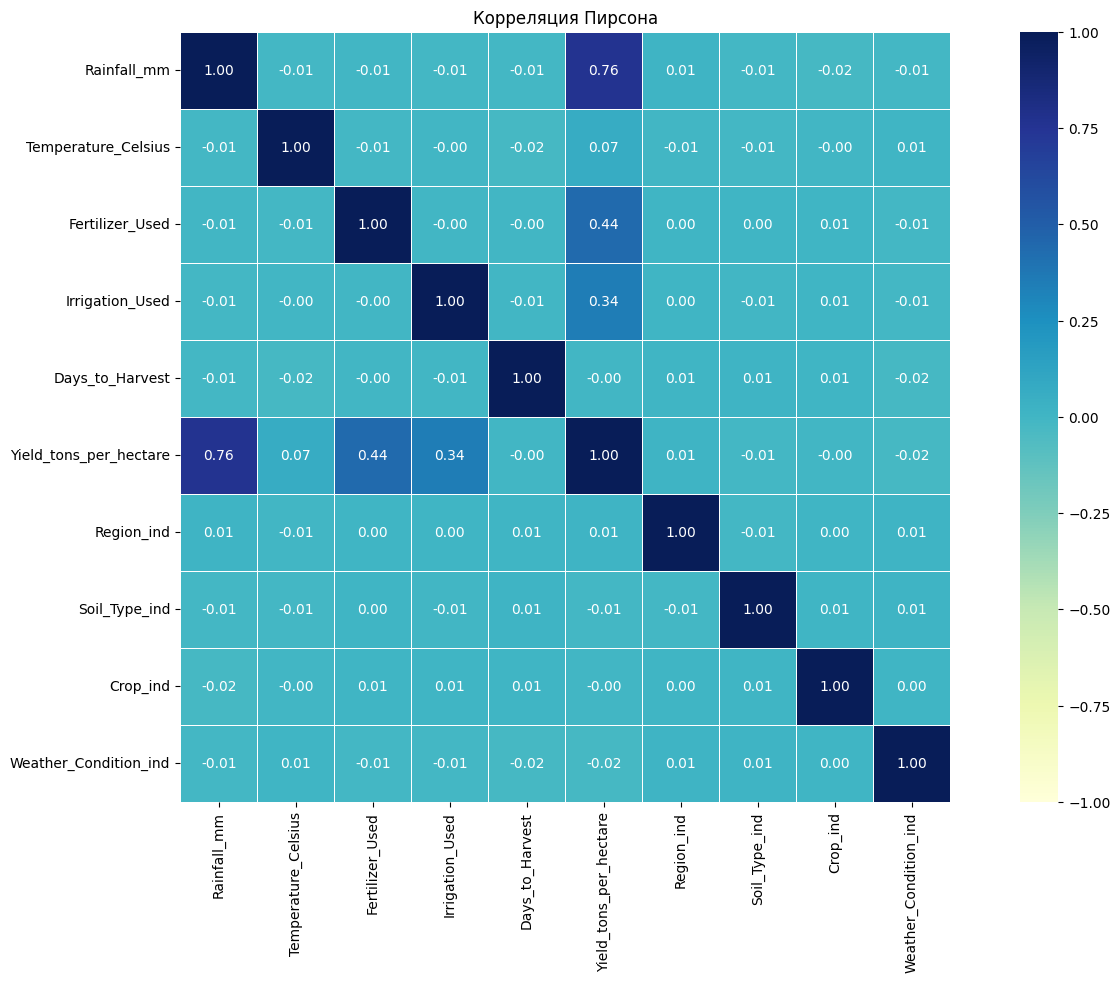

In [ ]:
# Вычисляем матрицу корреляций
corr_matrix = dataset.copy()
plt.figure(figsize=(18,10),dpi=100)

corr_matrix = corr_matrix.corr(method="pearson",numeric_only = True)
# Визуализируем матрицу корреляции
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, square=True)
plt.title("Корреляция Пирсона")

In [ ]:
# выведем названия фич
print(dataset.columns)

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare', 'Region_ind',
       'Soil_Type_ind', 'Crop_ind', 'Weather_Condition_ind'],
      dtype='object')


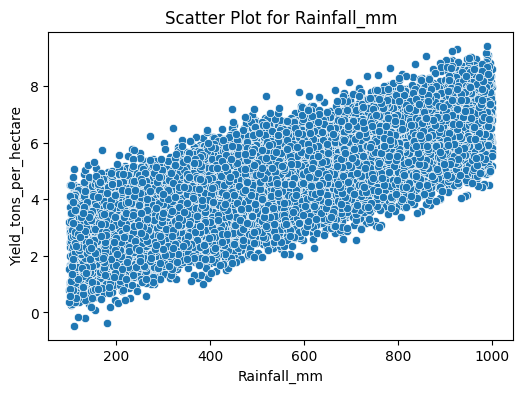

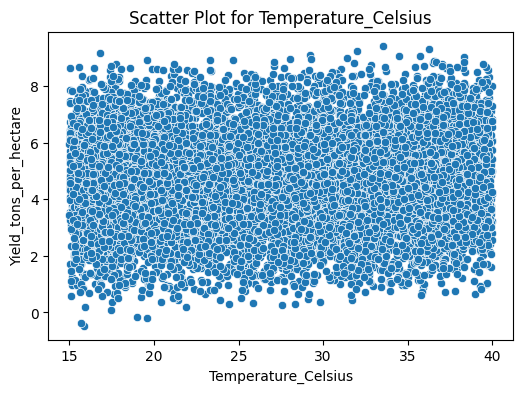

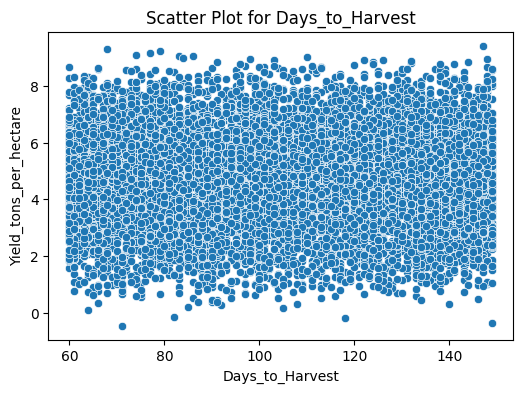

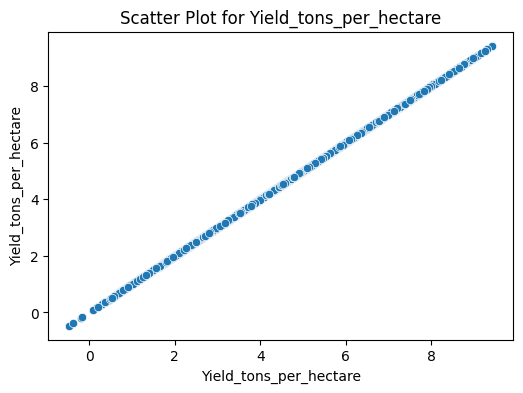

In [ ]:
# нарисуем диаграммы рассеяния, чтобы лучше понять, как признаки (фичи) связаны с целевой переменной

# Фильтрация числовых столбцов для построения диаграмм рассеяния
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Построение диаграмм рассеяния для каждого столбца
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=dataset, x=col, y='Yield_tons_per_hectare')  # y можно заменить другим столбцом, если не известно
    plt.title(f'Scatter Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Yield_tons_per_hectare')  # Замените на целевой столбец, если он известен
    plt.show()

In [ ]:
# подготавливаем датасет к обучению

X = dataset.drop(['Yield_tons_per_hectare', 'Region', 'Crop', 'Soil_Type', 'Weather_Condition'], axis=1)
y = dataset['Yield_tons_per_hectare']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (10000, 9) | y shape: (10000,) 


In [ ]:
# делим датасет на трейн и тест

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

#Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)


RMSE:  0.5083
  R2: 0.9072
 Adjusted R2: 0.9068
 Cross Validated R2: 0.9108


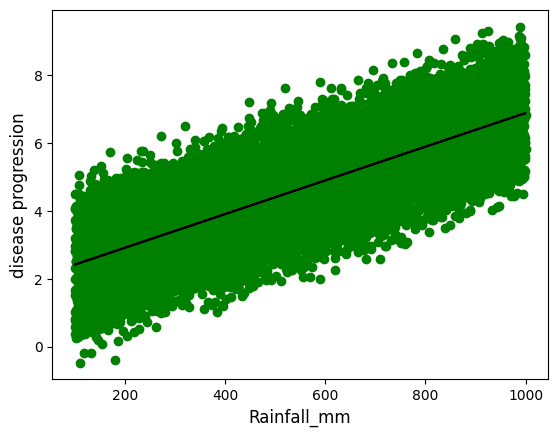

In [ ]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = dataset['Rainfall_mm'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dataset['Yield_tons_per_hectare'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('disease progression', size=12)
plt.xlabel('Rainfall_mm', size=12)
plt.show()



#Полиномиальная регрессия

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [ ]:
# Create a linear regression model
modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  0.5067
  R2: 0.9114
 Adjusted R2: 0.9044
 Cross Validated R2: 0.9059


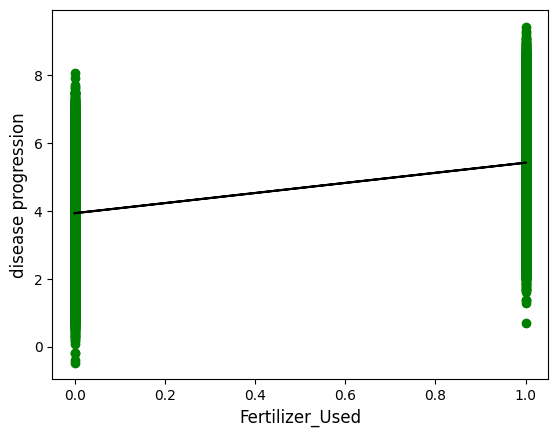

In [ ]:
X2 = dataset['Fertilizer_Used'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dataset['Yield_tons_per_hectare'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('disease progression', size=12)
plt.xlabel('Fertilizer_Used', size=12)
plt.show()


# Регрессия дерева принятия решений

Дерево решений является самым мощным и популярным инструментом для классификации и прогнозирования. Дерево принятия решений представляет собой древовидную структуру, похожую на блок-схему, где каждый внутренний узел обозначает тест по атрибуту, каждая ветвь представляет результат теста, а каждый конечный узел (терминальный узел) содержит метку класса. Существует непараметрический метод, используемый для моделирования дерева решений для прогнозирования непрерывного результата.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.7535
  R2: 0.796
 Adjusted R2: 0.7951
 Cross Validated R2: 0.8117


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a stepwise regression model
modelRF = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
modelRF.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.5408
  R2: 0.8949
 Adjusted R2: 0.8945
 Cross Validated R2: 0.8987


# Регрессия опорных векторов (SVR)

Регрессия опорных векторов (SVR) — это тип метода опорных векторов (SVM), который используется для задач регрессии. Он пытается найти функцию, которая наилучшим образом предсказывает непрерывное выходное значение для заданного входного значения.

SVR может использовать как линейные, так и нелинейные ядра. Линейное ядро — это простое скалярное произведение между двумя входными векторами, в то время как нелинейное ядро — это более сложная функция, которая может захватывать более сложные закономерности в данных. Выбор ядра зависит от характеристик данных и сложности задачи.

В пакете scikit-learn для Python вы можете использовать класс 'SVR' для выполнения SVR с линейным или нелинейным 'ядром'. Чтобы указать ядро, вы можете установить параметр ядра в 'linear' или 'RBF' (радиальная базисная функция).


Метод опорных векторов (SVM) — это   алгоритм контролируемого обучения, который может быть использован для задач классификации или регрессии. SVM пытаются найти гиперплоскость в многомерном пространстве, которое максимально разделяет различные классы или выходные значения.

Ядра: SVR может использовать различные типы ядер, которые представляют собой функции, определяющие сходство между входными векторами. Линейное ядро — это простое скалярное произведение между двумя входными векторами, в то время как нелинейное ядро — это более сложная функция, которая может захватывать более сложные закономерности в данных. Выбор ядра зависит от характеристик данных и сложности задачи.

Гиперпараметры: SVR имеет несколько гиперпараметров, которые можно настроить для управления поведением модели. Например, параметр 'C' управляет компромиссом между нечувствительными потерями и чувствительными потерями. Большее значение 'C' означает, что модель будет пытаться свести к минимуму нечувствительные потери в большей степени, в то время как меньшее значение C означает, что модель будет более снисходительной в отношении допускать большие ошибки.

Оценка модели: Как и в случае с любой моделью машинного обучения, важно оценить производительность модели SVR. Одним из распространенных способов сделать это является разделение данных на обучающий и тестовый наборы и использование обучающего набора в соответствии с моделью и тестового набора для ее оценки. Затем вы можете использовать такие метрики, как среднеквадратичная ошибка (MSE) или средняя абсолютная ошибка (MAE), чтобы измерить ошибку между прогнозируемыми и истинными выходными значениями.

In [ ]:
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  1.1143
  R2: 0.5539
 Adjusted R2: 0.5519
 Cross Validated R2: 0.5472


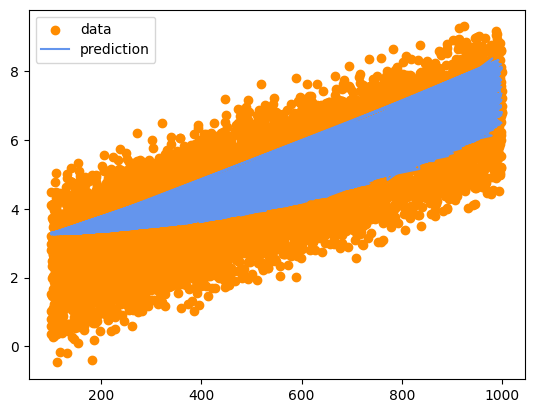

In [ ]:
plt.scatter(X_train["Rainfall_mm"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Rainfall_mm"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:

# Create a support vector regression model. Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  1.0709
  R2: 0.588
 Adjusted R2: 0.5861
 Cross Validated R2: 0.5903


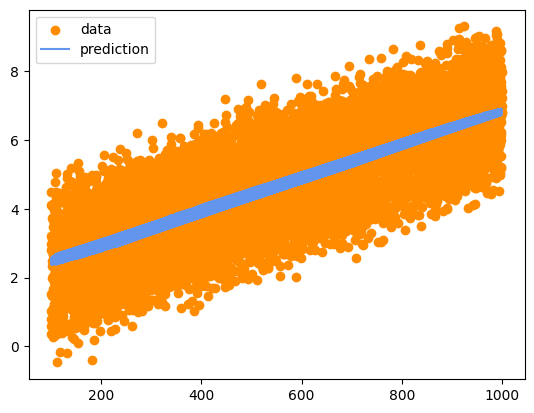

In [ ]:
plt.scatter(X_train["Rainfall_mm"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Rainfall_mm"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

#Эластичная сеть

In [ ]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  0.5702
  R2: 0.8832
 Adjusted R2: 0.8827
 Cross Validated R2: 0.8826


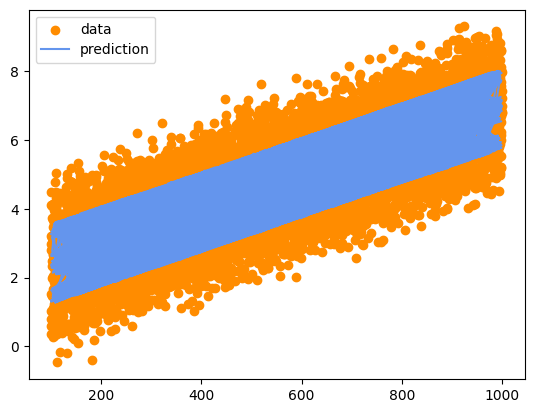

In [ ]:
plt.scatter(X_train["Rainfall_mm"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Rainfall_mm"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Задание

Попробовать методы регрессии на своих наборах данных.
Работа будет засчитана, если коэффициент детерминации будет не меньше, чем 0.85.
Чтобы достигнуть этой метрики вам понадобится:
1. загрузить данные
1. проанализировать их
1. предобработать данные
1. попробовать разные методы регрессии
1. получить метрики
1. визуализировать регрессию на одном из параметров